# Overlaying speed traces of two laps

Compare two fastest laps by overlaying their speed traces.


In [ ]:
%pip install fastf1
%pip install seaborn
%matplotlib inline


In [272]:
import matplotlib.pyplot as plt

import fastf1.plotting

import pandas as pd

from matplotlib.animation import FuncAnimation
import numpy as np
from IPython.display import HTML

import seaborn as sns

# enable some matplotlib patches for plotting timedelta values and load
# FastF1's default color scheme
fastf1.plotting.setup_mpl(misc_mpl_mods=False)

# load a session and its telemetry data
grand_prix_session = 'Q'
grand_prix_year = 2024
session = fastf1.get_session(grand_prix_year, 2, grand_prix_session)
grand_prix_name = session.event['EventName']
grand_prix_name_official = session.event['OfficialEventName']
session.load()

core           INFO 	Loading data for Saudi Arabian Grand Prix - Qualifying [v3.3.0]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
logger      WARNING 	Failed to load result data from Ergast!
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req           

First, we select the two laps that we want to compare



In [299]:
ver_lap = session.laps.pick_driver('VER').pick_fastest()
per_lap = session.laps.pick_driver('PER').pick_fastest()
#sai_lap = session.laps.pick_driver('SAI').pick_fastest()
lec_lap = session.laps.pick_driver('LEC').pick_fastest()
#bea_lap = session.laps.pick_driver('BEA').pick_fastest()
alo_lap = session.laps.pick_driver('ALO').pick_fastest()
str_lap = session.laps.pick_driver('STR').pick_fastest()
ham_lap = session.laps.pick_driver('HAM').pick_fastest()
rus_lap = session.laps.pick_driver('RUS').pick_fastest()

Next we get the telemetry data for each lap. We also add a 'Distance' column
to the telemetry dataframe as this makes it easier to compare the laps.



In [300]:
ver_tel = ver_lap.get_car_data().add_distance()
per_tel = per_lap.get_car_data().add_distance()
#sai_tel = sai_lap.get_car_data().add_distance()
lec_tel = lec_lap.get_car_data().add_distance()
#bea_tel = bea_lap.get_car_data().add_distance()
alo_tel = alo_lap.get_car_data().add_distance()
str_tel = str_lap.get_car_data().add_distance()
ham_tel = ham_lap.get_car_data().add_distance()
rus_tel = rus_lap.get_car_data().add_distance()

In [294]:
def format_lap_time(timedelta):
    """
    Formatea un objeto Timedelta a una cadena en el formato MM:SS.sss.
    
    :param timedelta: Timedelta, el tiempo de vuelta a formatear.
    :return: str, el tiempo formateado como MM:SS.sss.
    """
    total_seconds = timedelta.total_seconds()
    minutes = int(total_seconds // 60)
    seconds = total_seconds % 60
    formatted_time = f"{minutes:02d}:{seconds:06.3f}"
    return formatted_time

Finally, we create a plot and plot both speed traces.
We color the individual lines with the driver's team colors.



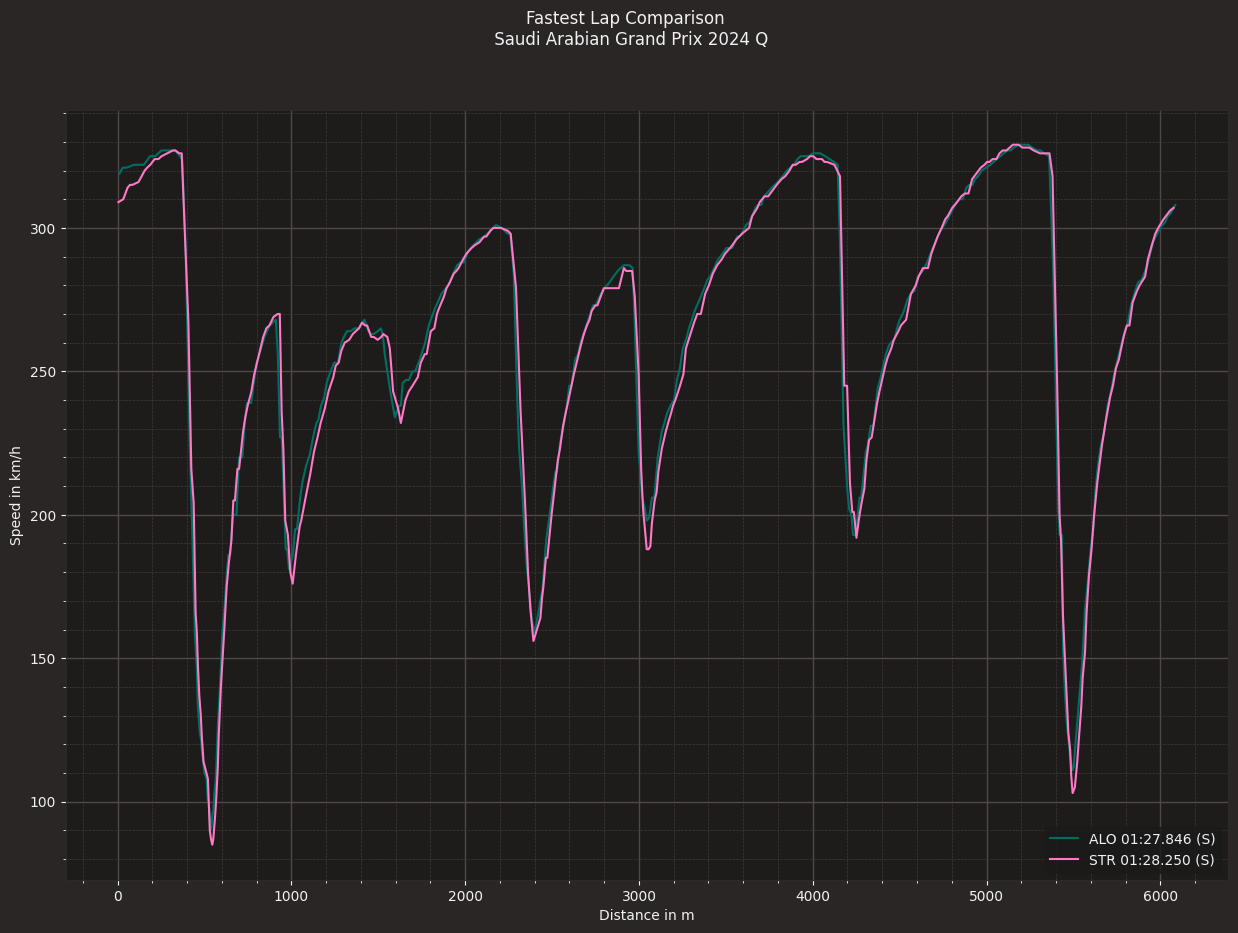

In [301]:
rbr_color = fastf1.plotting.team_color('RBR')
mer_color = fastf1.plotting.team_color('MER')
ast_color = fastf1.plotting.team_color('AST')
fer_color = fastf1.plotting.team_color('FER')
mcl_color = fastf1.plotting.team_color('MCL')

fig, ax = plt.subplots(figsize=(15, 10))
#ax.plot(ver_tel['Distance'], ver_tel['Speed'], label=f"VER {format_lap_time(ver_lap['LapTime'])} ({ver_lap['Compound'][0]})")
#ax.plot(per_tel['Distance'], per_tel['Speed'], label=f"PER {format_lap_time(per_lap['LapTime'])} ({per_lap['Compound'][0]})")
#ax.plot(ver_tel['Distance'], lec_tel['Speed'], label=f"LEC {format_lap_time(lec_lap['LapTime'])} ({lec_lap['Compound'][0]})")
#ax.plot(per_tel['Distance'], bea_tel['Speed'], label=f"BEA {format_lap_time(bea_lap['LapTime'])} ({bea_lap['Compound'][0]})")
#ax.plot(sai_tel['Distance'], sai_tel['Speed'], color=fer_color, label=f"SAI {format_lap_time(sai_lap['LapTime'])} ({sai_lap['Compound'][0]})")
ax.plot(alo_tel['Distance'], alo_tel['Speed'], color=ast_color, label=f"ALO {format_lap_time(alo_lap['LapTime'])} ({alo_lap['Compound'][0]})")
ax.plot(str_tel['Distance'], str_tel['Speed'], label=f"STR {format_lap_time(str_lap['LapTime'])} ({str_lap['Compound'][0]})")
#ax.plot(ham_tel['Distance'], ham_tel['Speed'], color=mer_color, label=f"HAM {format_lap_time(ham_lap['LapTime'])} ({ham_lap['Compound'][0]})")
#ax.plot(rus_tel['Distance'], rus_tel['Speed'], color=mer_color, label=f"RUS {format_lap_time(rus_lap['LapTime'])} ({rus_lap['Compound'][0]})")

ax.set_xlabel('Distance in m')
ax.set_ylabel('Speed in km/h')

ax.legend()
plt.suptitle(f"Fastest Lap Comparison \n "
             f"{grand_prix_name} {session.event.year} {grand_prix_session}")

plt.show()

In [ ]:
# Obtén una lista única de corredores desde la sesión
corredores = session.laps['Driver'].unique()

# Prepara la figura de matplotlib
#fig, ax = plt.subplots()
# Prepara la figura de matplotlib con un tamaño mayor
fig, ax = plt.subplots(figsize=(15, 10))  # Ajusta estos valores para cambiar el tamaño


# Itera sobre cada corredor para obtener su vuelta más rápida y graficarla
for corredor in corredores:
    # Selecciona la vuelta más rápida
    vuelta_rapida = session.laps.pick_driver(corredor).pick_fastest()
    
    # Extrae los datos del coche y agrega la distancia
    datos_coche = vuelta_rapida.get_car_data().add_distance()
    
    # Determina el equipo del corredor (si la información está disponible)
    equipo = vuelta_rapida['Team']
    
    # Obtiene el color asociado al equipo del corredor
    color_equipo = fastf1.plotting.team_color(equipo)
    
    # Formatea el tiempo de vuelta para la etiqueta
    tiempo_vuelta = format_lap_time(vuelta_rapida['LapTime'])
    
    # Añade la traza al gráfico
    ax.plot(datos_coche['Distance'], datos_coche['Speed'], color=color_equipo, 
            label=f"{corredor} {tiempo_vuelta} ({vuelta_rapida['Compound'][0]})")

# Ajusta detalles finales del gráfico
ax.legend()
plt.show()

In [ ]:

fastf1.plotting.setup_mpl()

# Asumiendo que 'session' ya contiene los datos de la sesión de interés cargados
# Obtén todas las vueltas más rápidas de todos los corredores
vueltas_rapidas = [session.laps.pick_driver(corredor).pick_fastest() for corredor in session.laps['Driver'].unique()]

# Filtra las vueltas para asegurar que todas tienen un tiempo registrado
vueltas_rapidas = [vuelta for vuelta in vueltas_rapidas if vuelta['LapTime'] is not None]

# Ordena las vueltas por tiempo de vuelta
vueltas_rapidas.sort(key=lambda x: x['LapTime'])

# Selecciona las 10 vueltas más rápidas
diez_vueltas_mas_rapidas = vueltas_rapidas[:8]

# Prepara la figura de matplotlib con un tamaño mayor
fig, ax = plt.subplots(figsize=(15, 10))

# Grafica cada una de las 10 vueltas más rápidas
for vuelta in diez_vueltas_mas_rapidas:
    datos_coche = vuelta.get_car_data().add_distance()
    equipo = vuelta['Team']
    color_equipo = fastf1.plotting.team_color(equipo)
    corredor = vuelta['Driver']
    #tiempo_vuelta = vuelta['LapTime'].total_seconds()  # Modifica aquí según cómo desees formatear el tiempo
    tiempo_vuelta = format_lap_time(vuelta['LapTime'])
    
    ax.plot(datos_coche['Distance'], datos_coche['Speed'], 
            label=f"{corredor} {tiempo_vuelta} ({vuelta_rapida['Compound'][0]})")

# Añade leyendas y ajustes finales al gráfico
ax.legend()
plt.show()

In [ ]:
fastf1.plotting.setup_mpl()

# Preparación inicial igual...
vueltas_rapidas = [session.laps.pick_driver(corredor).pick_fastest() for corredor in session.laps['Driver'].unique()]
vueltas_rapidas = [vuelta for vuelta in vueltas_rapidas if vuelta['LapTime'] is not None]
vueltas_rapidas.sort(key=lambda x: x['LapTime'])
diez_vueltas_mas_rapidas = vueltas_rapidas[:8]

# Vuelta de referencia (la mejor vuelta)
vuelta_referencia = vueltas_rapidas[0]
datos_coche_ref = vuelta_referencia.get_car_data().add_distance()
tiempo_ref = datos_coche_ref['Time'].dt.total_seconds()

fig, ax1 = plt.subplots(figsize=(15, 10))
ax2 = ax1.twinx()  # Segundo eje para el gap de tiempo

for vuelta in diez_vueltas_mas_rapidas:
    datos_coche = vuelta.get_car_data().add_distance()
    equipo = vuelta['Team']
    color_equipo = fastf1.plotting.team_color(equipo)
    corredor = vuelta['Driver']
    tiempo_vuelta = format_lap_time(vuelta['LapTime'])

    # Graficar la velocidad en el primer eje
    ax1.plot(datos_coche['Distance'], datos_coche['Speed'], label=f"{corredor} {tiempo_vuelta} ({vuelta['Compound'][0]})", color=color_equipo)

    # Calcular y graficar el gap de tiempo en el segundo eje
    tiempo_vuelta_sec = datos_coche['Time'].dt.total_seconds()
    distancia = datos_coche['Distance']
    tiempo_ref_interp = np.interp(distancia, datos_coche_ref['Distance'], tiempo_ref)
    gap_tiempo = tiempo_vuelta_sec - tiempo_ref_interp
    
    # Para evitar superposición de etiquetas, podemos no añadir una leyenda aquí, o usar un esquema de color/nombres diferenciado
    ax2.plot(distancia, gap_tiempo, linestyle='--', color=color_equipo, alpha=0.5)  # alpha para diferenciar la línea de gap

# Configuración de los ejes
ax1.set_xlabel('Distancia (m)')
ax1.set_ylabel('Velocidad (km/h)', color='tab:blue')
ax2.set_ylabel('Gap de tiempo (s)', color='tab:red')
ax1.legend(loc='upper left')

plt.show()

In [197]:
fastf1.plotting.setup_mpl()

# Preparación inicial igual...
vueltas_rapidas = [session.laps.pick_driver(corredor).pick_fastest() for corredor in session.laps['Driver'].unique()]
vueltas_rapidas = [vuelta for vuelta in vueltas_rapidas if vuelta['LapTime'] is not None]
vueltas_rapidas.sort(key=lambda x: x['LapTime'])
diez_vueltas_mas_rapidas = vueltas_rapidas[:8]

# Vuelta de referencia (la mejor vuelta)
vuelta_referencia = vueltas_rapidas[0]
datos_coche_ref = vuelta_referencia.get_car_data().add_distance()
tiempo_ref = datos_coche_ref['Time'].dt.total_seconds()

fig, ax1 = plt.subplots(figsize=(15, 10))
ax2 = ax1.twinx()  # Segundo eje para el gap de tiempo

# Distancias específicas para mostrar el gap de tiempo
distancias_puntos = [450, 1500, 3000, 5000]

# Inicializar diccionario para almacenar los gaps en puntos específicos
gaps_en_puntos = {distancia: [] for distancia in distancias_puntos}

for vuelta in diez_vueltas_mas_rapidas:
    datos_coche = vuelta.get_car_data().add_distance()
    equipo = vuelta['Team']
    color_equipo = fastf1.plotting.team_color(equipo)
    corredor = vuelta['Driver']
    tiempo_vuelta = format_lap_time(vuelta['LapTime'])

    ax1.plot(datos_coche['Distance'], datos_coche['Speed'], label=f"{corredor} {tiempo_vuelta} ({vuelta['Compound'][0]})")

    # Cálculo de gap de tiempo
    tiempo_vuelta_sec = datos_coche['Time'].dt.total_seconds()
    distancia = datos_coche['Distance']
    tiempo_ref_interp = np.interp(distancia, datos_coche_ref['Distance'], tiempo_ref)
    gap_tiempo = tiempo_vuelta_sec - tiempo_ref_interp
    ax2.plot(distancia, gap_tiempo, linestyle='--', alpha=0.5)

    # Calcular y almacenar el gap de tiempo en puntos específicos de distancia
    for punto in distancias_puntos:
        gap_en_punto = np.interp(punto, distancia, gap_tiempo)
        gaps_en_puntos[punto].append((corredor, gap_en_punto))

# Añadir líneas verticales y anotaciones para los puntos específicos
for punto in distancias_puntos:
    # Línea vertical en cada punto específico
    ax1.axvline(x=punto, color='grey', linestyle='--', alpha=0.7)

    # Anotar los gaps de tiempo en los puntos específicos
    texto_anotacion = f"Gap en {punto}m:\n" + "\n".join([f"{corredor}: {gap:.2f}s" for corredor, gap in gaps_en_puntos[punto]])
    ax1.text(punto, ax1.get_ylim()[1], texto_anotacion, verticalalignment='top', horizontalalignment='right')

# Configuración de los ejes
ax1.set_xlabel('Distancia (m)')
ax1.set_ylabel('Velocidad (km/h)', color='tab:blue')
ax2.set_ylabel('Gap de tiempo (s)', color='tab:red')
ax1.legend()

plt.show()

/Users/enrique/Library/Python/3.9/lib/python/site-packages/fastf1/core.py:3063: FutureWarning: In the future, `None` will be returned instead of an empty `Lap` object when there are no laps that satisfy the definition for fastest lap.
  warnings.warn(("In the future, `None` will be returned instead of "


AttributeError: 'float' object has no attribute 'total_seconds'

In [ ]:
#####

In [ ]:

rus_laps = session.laps.pick_driver('RUS')
ham_laps = session.laps.pick_driver('HAM')
lap_times = pd.DataFrame({
    'Lap Number': rus_laps['LapNumber'],
    'Lap Time': rus_laps['LapTime']
})

# Mostrar la tabla
print(lap_times)

In [ ]:
# Convertir los tiempos por vuelta a segundos para la visualización
rus_laps_time = rus_laps['LapTime'].dt.total_seconds()
ham_laps_time = ham_laps['LapTime'].dt.total_seconds()

# Crear un gráfico de los tiempos por vuelta
plt.figure(figsize=(10, 6))
plt.plot(rus_laps['LapNumber'], rus_laps_time, marker='o', color='blue', label='RUS')
plt.plot(ham_laps['LapNumber'], ham_laps_time, marker='s', color='purple', label='HAM')

# Establecer los títulos y etiquetas
plt.title(f'Tiempos por Vuelta en {grand_prix_name} {grand_prix_session}')
plt.xlabel('Número de Vuelta')
plt.ylabel('Tiempo por Vuelta (segundos)')

# Mejorar el formato del gráfico
plt.grid(True)
plt.tight_layout()
plt.legend()
# Mostrar el gráfico
plt.show()

In [ ]:
### animacion


NameError: name 'rus_lap_times' is not defined

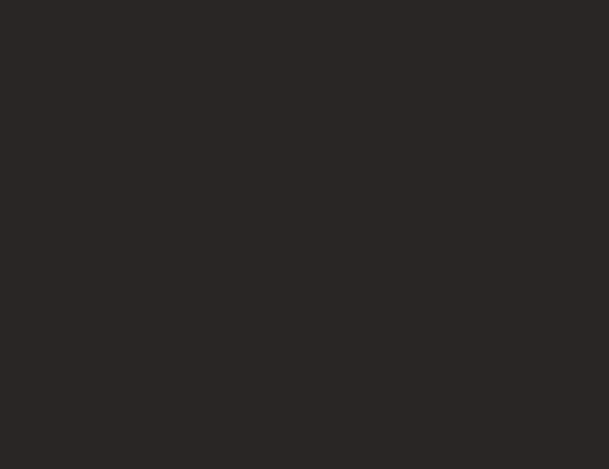

In [281]:
# Asumiendo que 'session' y 'laps' ya están definidos y que tienes 'rus_laps' y 'ham_laps'
# Convertir los tiempos por vuelta a segundos
rus_lap_times_seconds = rus_laps['LapTime'].dt.total_seconds()
ham_lap_times_seconds = ham_laps['LapTime'].dt.total_seconds()

# Preparar el DataFrame para Hamilton similar a Russell
ham_lap_times = pd.DataFrame({
    'Lap Number': ham_laps['LapNumber'],
    'Lap Time': ham_lap_times_seconds
})

# Máximo número de vueltas (para el rango de frames)
max_laps = max(rus_laps['LapNumber'].max(), ham_laps['LapNumber'].max())


# Inicialización de la figura de Matplotlib
fig, ax = plt.subplots()

# Función para configurar el gráfico inicialmente
def init():
    ax.set_xlim(0, max_laps + 1)
    ax.set_ylim(0, max(rus_lap_times_seconds.max(), ham_lap_times_seconds.max()) + 10)
    ax.set_xlabel('Lap Number')
    ax.set_ylabel('Lap Time (seconds)')
    ax.set_title('Lap Time Comparison: Russell vs. Hamilton')
    return ax,

# Función de actualización para la animación
def update(frame):
    ax.clear()
    init()
    # Asegúrate de actualizar esta parte con tus datos
    ax.plot(rus_lap_times['Lap Number'][:frame], rus_lap_times['Lap Time'][:frame], label='Russell', color='blue')
    ax.plot(ham_lap_times['Lap Number'][:frame], ham_lap_times['Lap Time'][:frame], label='Hamilton', color='red')
    ax.legend()
    return ax,

# Crear la animación
ani = FuncAnimation(fig, update, frames=np.arange(1, max_laps + 2), init_func=init, blit=True, repeat=False)

# Mostrar la animación
HTML(ani.to_jshtml())

MUESTRA GRAFICA

/Users/enrique/Library/Python/3.9/lib/python/site-packages/fastf1/core.py:3063: FutureWarning: In the future, `None` will be returned instead of an empty `Lap` object when there are no laps that satisfy the definition for fastest lap.
  warnings.warn(("In the future, `None` will be returned instead of "


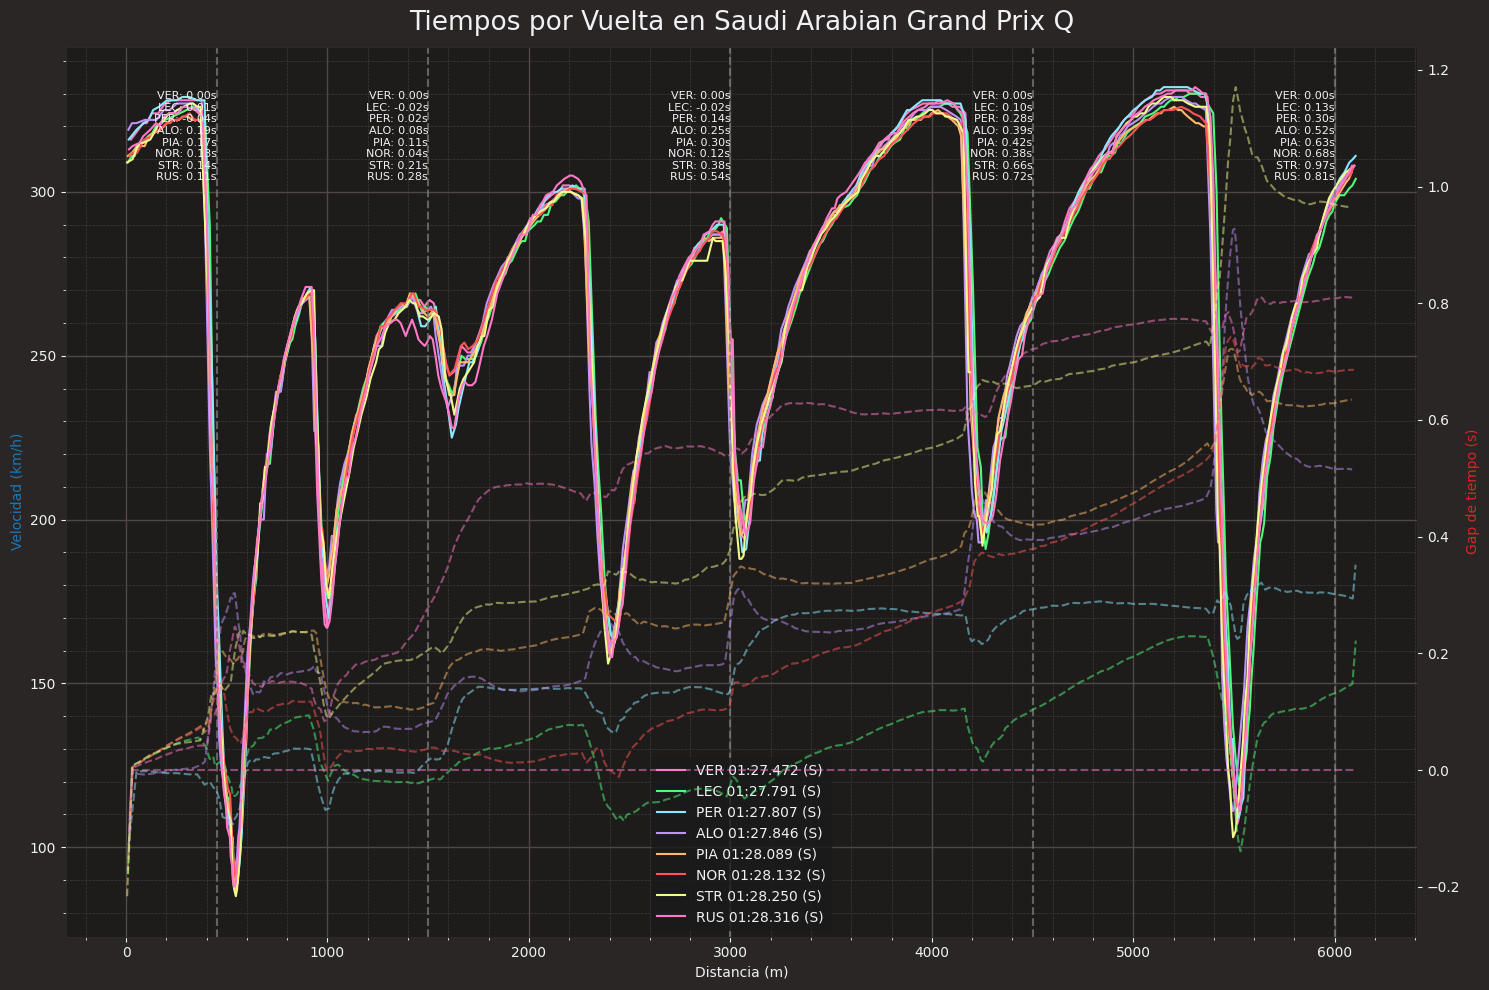

In [276]:
fastf1.plotting.setup_mpl()

vueltas_rapidas = [session.laps.pick_driver(corredor).pick_fastest() for corredor in session.laps['Driver'].unique()]
vueltas_rapidas = [vuelta for vuelta in vueltas_rapidas if pd.notna(vuelta['LapTime'])]

# Si LapTime ya está en segundos (o convertido a float), ordena directamente
vueltas_rapidas.sort(key=lambda x: x['LapTime'])

diez_vueltas_mas_rapidas = vueltas_rapidas[:8]

# Identificación de la vuelta de referencia (la mejor vuelta) y obtención de su telemetría
vuelta_referencia = vueltas_rapidas[0]
datos_coche_ref = vuelta_referencia.get_car_data().add_distance()
tiempo_ref = datos_coche_ref['Time'].dt.total_seconds()

# Preparación del gráfico con un tamaño mayor
fig, ax1 = plt.subplots(figsize=(15, 10))
ax2 = ax1.twinx()  # Creación de un segundo eje para el gap de tiempo

# Definición de las distancias específicas para mostrar el gap de tiempo
distancias_puntos = [450, 1500, 3000, 4500, 6000]

# Inicialización de un diccionario para almacenar los gaps en puntos específicos
gaps_en_puntos = {distancia: [] for distancia in distancias_puntos}

# Procesamiento y gráfica de cada una de las vueltas seleccionadas
for vuelta in diez_vueltas_mas_rapidas:
    datos_coche = vuelta.get_car_data().add_distance()
    equipo = vuelta['Team']
    #color_equipo = fastf1.plotting.team_color(equipo)
    corredor = vuelta['Driver']
    tiempo_vuelta = format_lap_time(vuelta['LapTime'])  # Asegúrate de tener esta función definida
    
    # Gráfica de la velocidad en el primer eje y
    ax1.plot(datos_coche['Distance'], datos_coche['Speed'], label=f"{corredor} {tiempo_vuelta} ({vuelta['Compound'][0]})")
    
    # Cálculo y gráfica del gap de tiempo en el segundo eje y
    tiempo_vuelta_sec = datos_coche['Time'].dt.total_seconds()
    distancia = datos_coche['Distance']
    tiempo_ref_interp = np.interp(distancia, datos_coche_ref['Distance'], tiempo_ref)
    gap_tiempo = tiempo_vuelta_sec - tiempo_ref_interp
    ax2.plot(distancia, gap_tiempo, linestyle='--', alpha=0.5)

    # Cálculo del gap de tiempo en puntos específicos de distancia y almacenamiento para anotaciones posteriores
    for punto in distancias_puntos:
        gap_en_punto = np.interp(punto, distancia, gap_tiempo)
        gaps_en_puntos[punto].append(f"{corredor}: {gap_en_punto:.2f}s")

# Añadir líneas verticales y anotaciones de gap de tiempo en puntos específicos
for punto in distancias_puntos:
    ax1.axvline(x=punto, color='grey', linestyle='--', alpha=0.7)
    
    # Calcular el ajuste para bajar la anotación
    rango_y = ax1.get_ylim()[1] - ax1.get_ylim()[0]  # Diferencia entre el valor máximo y mínimo del eje y
    ajuste = rango_y * 0.05  # Ajuste del 5% del rango del eje y, modifica este valor según necesidad
    
    # Actualiza la posición de la anotación para moverla un poco más abajo
    texto_anotacion = "\n".join(gaps_en_puntos[punto])
    ax1.text(punto, ax1.get_ylim()[1] - ajuste, texto_anotacion, verticalalignment='top', horizontalalignment='right', fontsize=8)

# Configuración de los ejes y visualización final
ax1.set_xlabel('Distancia (m)')
ax1.set_ylabel('Velocidad (km/h)', color='tab:blue')
ax2.set_ylabel('Gap de tiempo (s)', color='tab:red')
ax1.legend()
plt.title(f'Tiempos por Vuelta en {grand_prix_name} {grand_prix_session}')
plt.tight_layout()
plt.show()

EXPORTA DATOS Y CREA GRAFICA

/Users/enrique/Library/Python/3.9/lib/python/site-packages/fastf1/core.py:3063: FutureWarning: In the future, `None` will be returned instead of an empty `Lap` object when there are no laps that satisfy the definition for fastest lap.
  warnings.warn(("In the future, `None` will be returned instead of "


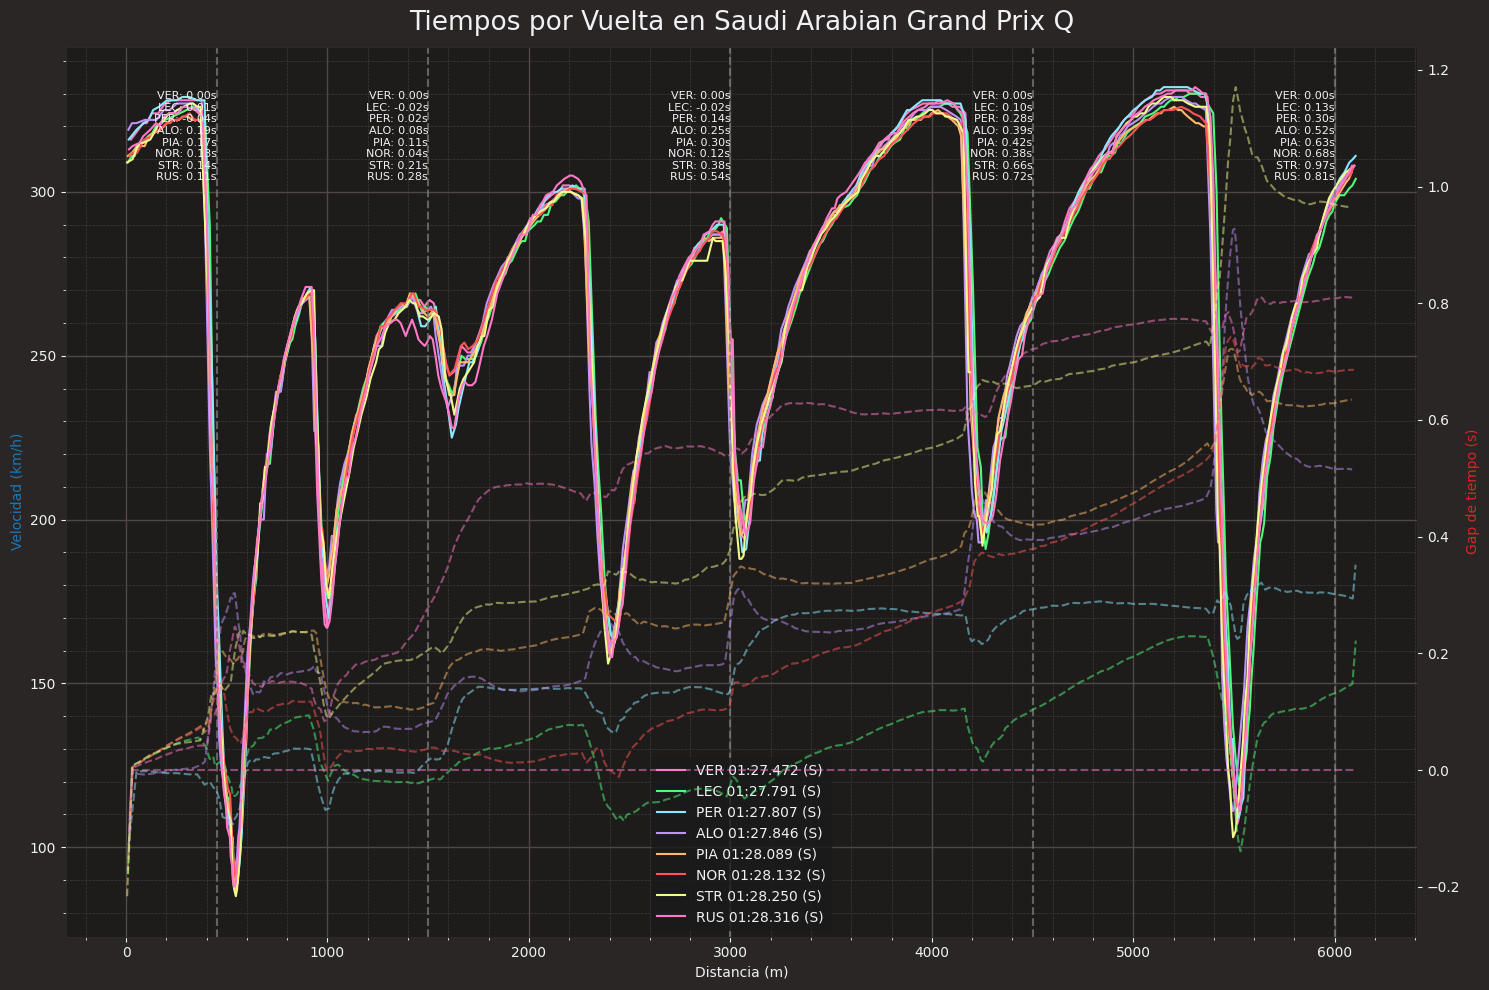

In [278]:
fastf1.plotting.setup_mpl()

vueltas_rapidas = [session.laps.pick_driver(corredor).pick_fastest() for corredor in session.laps['Driver'].unique()]
vueltas_rapidas = [vuelta for vuelta in vueltas_rapidas if pd.notna(vuelta['LapTime'])]

# Si LapTime ya está en segundos (o convertido a float), ordena directamente
vueltas_rapidas.sort(key=lambda x: x['LapTime'])

diez_vueltas_mas_rapidas = vueltas_rapidas[:8]

# Identificación de la vuelta de referencia (la mejor vuelta) y obtención de su telemetría
vuelta_referencia = vueltas_rapidas[0]
datos_coche_ref = vuelta_referencia.get_car_data().add_distance()
tiempo_ref = datos_coche_ref['Time'].dt.total_seconds()

# Preparación del gráfico con un tamaño mayor
fig, ax1 = plt.subplots(figsize=(15, 10))
ax2 = ax1.twinx()  # Creación de un segundo eje para el gap de tiempo

# Definición de las distancias específicas para mostrar el gap de tiempo
distancias_puntos = [450, 1500, 3000, 4500, 6000]

# Inicialización de un diccionario para almacenar los gaps en puntos específicos
gaps_en_puntos = {distancia: [] for distancia in distancias_puntos}

# Lista para almacenar los datos antes de crear el DataFrame
datos_list = []

# Procesamiento y gráfica de cada una de las vueltas seleccionadas
for vuelta in diez_vueltas_mas_rapidas:
    datos_coche = vuelta.get_car_data().add_distance()
    equipo = vuelta['Team']
    #color_equipo = fastf1.plotting.team_color(equipo)
    corredor = vuelta['Driver']
    tiempo_vuelta = format_lap_time(vuelta['LapTime'])  # Asegúrate de tener esta función definida
    
    # Gráfica de la velocidad en el primer eje y
    ax1.plot(datos_coche['Distance'], datos_coche['Speed'], label=f"{corredor} {tiempo_vuelta} ({vuelta['Compound'][0]})")
    
    # Cálculo y gráfica del gap de tiempo en el segundo eje y
    tiempo_vuelta_sec = datos_coche['Time'].dt.total_seconds()
    distancia = datos_coche['Distance']
    tiempo_ref_interp = np.interp(distancia, datos_coche_ref['Distance'], tiempo_ref)
    gap_tiempo = tiempo_vuelta_sec - tiempo_ref_interp
    ax2.plot(distancia, gap_tiempo, linestyle='--', alpha=0.5)

    # Compilar datos para cada punto de distancia
    for d, s, g in zip(distancia, datos_coche['Speed'], gap_tiempo):
        datos_list.append({
            'Driver': corredor, 
            'LapTime': tiempo_vuelta, 
            'Distance': d, 
            'Speed': s, 
            'GapTime': g
        })

    # Cálculo del gap de tiempo en puntos específicos de distancia y almacenamiento para anotaciones posteriores
    for punto in distancias_puntos:
        gap_en_punto = np.interp(punto, distancia, gap_tiempo)
        gaps_en_puntos[punto].append(f"{corredor}: {gap_en_punto:.2f}s")

# Añadir líneas verticales y anotaciones de gap de tiempo en puntos específicos
for punto in distancias_puntos:
    ax1.axvline(x=punto, color='grey', linestyle='--', alpha=0.7)
    
    # Calcular el ajuste para bajar la anotación
    rango_y = ax1.get_ylim()[1] - ax1.get_ylim()[0]  # Diferencia entre el valor máximo y mínimo del eje y
    ajuste = rango_y * 0.05  # Ajuste del 5% del rango del eje y, modifica este valor según necesidad
    
    # Actualiza la posición de la anotación para moverla un poco más abajo
    texto_anotacion = "\n".join(gaps_en_puntos[punto])
    ax1.text(punto, ax1.get_ylim()[1] - ajuste, texto_anotacion, verticalalignment='top', horizontalalignment='right', fontsize=8)

# Configuración de los ejes y visualización final
ax1.set_xlabel('Distancia (m)')
ax1.set_ylabel('Velocidad (km/h)', color='tab:blue')
ax2.set_ylabel('Gap de tiempo (s)', color='tab:red')
ax1.legend()
plt.title(f'Tiempos por Vuelta en {grand_prix_name} {grand_prix_session}')
plt.tight_layout()
plt.show()

# Crear el DataFrame de pandas a partir de la lista de datos
datos_para_exportar = pd.DataFrame(datos_list)

# Exportar el DataFrame a un archivo CSV
ruta_archivo = 'datos_vueltas_rapidas.csv'
datos_para_exportar.to_csv(ruta_archivo, index=False)

## Team comparison

In [279]:
laps = session.laps.pick_quicklaps()
transformed_laps = laps.copy()
transformed_laps.loc[:, "LapTime (s)"] = laps["LapTime"].dt.total_seconds()

# order the team from the fastest (lowest median lap time) tp slower
team_order = (
    transformed_laps[["Team", "LapTime (s)"]]
    .groupby("Team")
    .median()["LapTime (s)"]
    .sort_values()
    .index
)
print(team_order)

# make a color palette associating team names to hex codes
team_palette = {team: fastf1.plotting.team_color(team) for team in team_order}

Index(['Red Bull Racing', 'Aston Martin', 'McLaren', 'Ferrari', 'Mercedes',
       'RB', 'Haas F1 Team', 'Williams', 'Kick Sauber', 'Alpine'],
      dtype='object', name='Team')


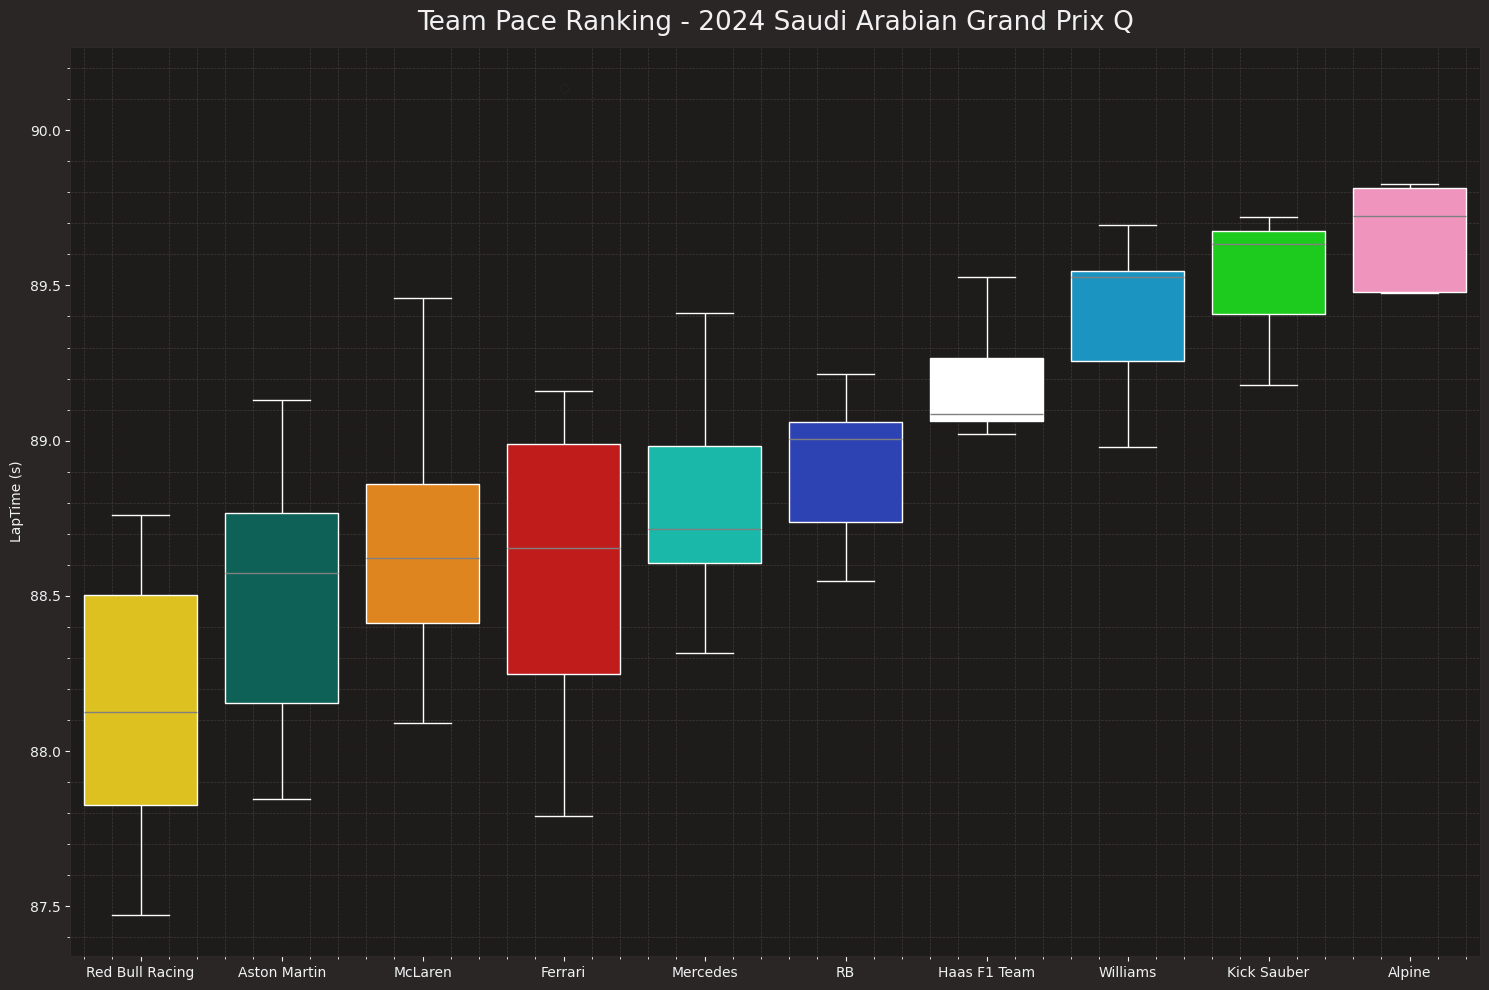

In [280]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(
    data=transformed_laps,
    x="Team",
    y="LapTime (s)",
    hue="Team",
    order=team_order,
    palette=team_palette,
    whiskerprops=dict(color="white"),
    boxprops=dict(edgecolor="white"),
    medianprops=dict(color="grey"),
    capprops=dict(color="white"),
)

plt.title(f"Team Pace Ranking - {grand_prix_year} {grand_prix_name} {grand_prix_session}")
plt.grid(visible=False)

# x-label is redundant
ax.set(xlabel=None)
plt.tight_layout()
plt.show()